# Data clean up

The data provided in the CSV files contains some inconsistencies and missing values that need to be addressed before we can use it for classification. In this notebook, we will perform the following data clean-up tasks:

1. Handle missing values
2. Remove duplicates
3. Address outliers
4. Encode categorical variables (not needed since we have one but it's already numeric)

Let's get started with these tasks.

In [14]:
import pandas as pd
import numpy as np
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer


df = pd.read_csv("../data/interim/merged_yield_tables.csv")

target_variable = "tree_type"
features = [
    "age",
    "average_height",
    "dbh",
    "trees_per_ha",
    "basal_area",
]
numerical_features = [col for col in features if col != "tree_type"]
categorical_features = []

relevant_columns = [target_variable] + features
df.head()

,id,yield_class,age,dominant_height,average_height,dbh,taper,trees_per_ha,basal_area,volume_per_ha,average_annual_age_increment,total_growth_performance,current_annual_increment,mean_annual_increment,title,tree_type
0,1,15.0,20,5.9,5.3,11.5,0.396,2585.0,26.8,54.0,2.7,63.0,NaN,3.2,Fichte Hochgebirge,coniferous
1,1,15.0,30,12.2,10.6,16.7,0.458,1708.0,37.5,180.0,6.0,208.0,14.5,6.9,Fichte Hochgebirge,coniferous
2,1,15.0,40,18.3,15.7,21.6,0.460,1266.0,46.3,334.0,8.4,397.0,18.9,9.9,Fichte Hochgebirge,coniferous
3,1,15.0,50,23.4,20.5,26.1,0.456,1003.0,53.5,499.0,10.0,605.0,20.8,12.1,Fichte Hochgebirge,coniferous
4,1,15.0,60,27.6,24.6,30.2,0.451,830.0,59.4,659.0,11.0,815.0,21.0,13.6,Fichte Hochgebirge,coniferous


## Remove rows with missing values

We will drop any rows with missing values. The size of the dataset will still be sufficient for our classification task.

In [15]:
size_before_empty_removal = df.shape[0]
df = df[relevant_columns]
df = df.dropna()
size_after_empty_removal = df.shape[0]

print(
    f"Removed {size_before_empty_removal - size_after_empty_removal} rows with missing values. New dataset size: {df.shape[0]} rows."
)
df.head()

Removed 6100 rows with missing values. New dataset size: 8298 rows.


,tree_type,age,average_height,dbh,trees_per_ha,basal_area
0,coniferous,20,5.3,11.5,2585.0,26.8
1,coniferous,30,10.6,16.7,1708.0,37.5
2,coniferous,40,15.7,21.6,1266.0,46.3
3,coniferous,50,20.5,26.1,1003.0,53.5
4,coniferous,60,24.6,30.2,830.0,59.4


## Remove duplicates

In [16]:
size_before_duplicate_removal = df.shape[0]
df = df.drop_duplicates()
size_after_duplicate_removal = df.shape[0]

print(
    f"Removed {size_before_duplicate_removal - size_after_duplicate_removal} duplicate rows. New dataset size: {df.shape[0]} rows."
)
df.head()

Removed 69 duplicate rows. New dataset size: 8229 rows.


,tree_type,age,average_height,dbh,trees_per_ha,basal_area
0,coniferous,20,5.3,11.5,2585.0,26.8
1,coniferous,30,10.6,16.7,1708.0,37.5
2,coniferous,40,15.7,21.6,1266.0,46.3
3,coniferous,50,20.5,26.1,1003.0,53.5
4,coniferous,60,24.6,30.2,830.0,59.4


## Handle missing values

In [17]:
def handle_missing_values(df, target_col, numerical_cols, categorical_cols):
    """Handle missing values with appropriate strategies"""
    df_clean = df.copy()

    # Impute numerical features
    if numerical_cols:
        num_imputer = SimpleImputer(strategy="median")
        df_clean[numerical_cols] = num_imputer.fit_transform(df_clean[numerical_cols])

    # Impute categorical features
    if categorical_cols:
        cat_imputer = SimpleImputer(strategy="most_frequent")
        df_clean[categorical_cols] = cat_imputer.fit_transform(
            df_clean[categorical_cols]
        )

    return df_clean


df = handle_missing_values(
    df,
    target_variable,
    numerical_features,
    categorical_features,
)
df.head()

,tree_type,age,average_height,dbh,trees_per_ha,basal_area
0,coniferous,20.0,5.3,11.5,2585.0,26.8
1,coniferous,30.0,10.6,16.7,1708.0,37.5
2,coniferous,40.0,15.7,21.6,1266.0,46.3
3,coniferous,50.0,20.5,26.1,1003.0,53.5
4,coniferous,60.0,24.6,30.2,830.0,59.4


## Visualize results

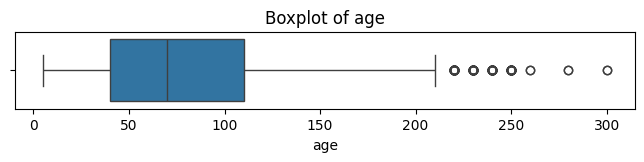

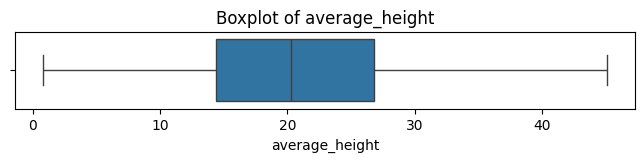

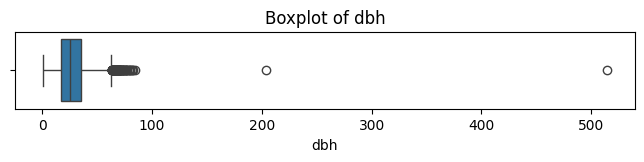

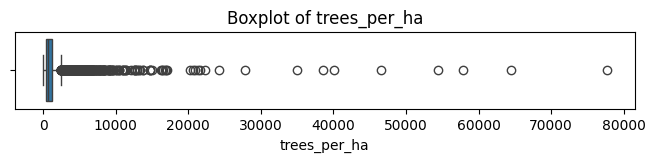

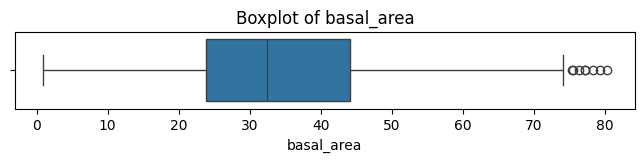

In [18]:
# Print boxplots for each numerical feature
for feature in numerical_features:
    plt.figure(figsize=(8, 1))
    sns.boxplot(x=df[feature])
    plt.title(f"Boxplot of {feature}")
    plt.show()

# Print number of appearances for each categorical feature
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=df[feature])
    plt.title(f"Countplot of {feature}")
    plt.show()

In [19]:
# Save cleaned data
df.to_csv("../data/interim/cleaned_yield_tables.csv", index=False)